In [169]:
#Import libraries
import numpy as np
import pylab as py
import seaborn as sns

# Poisson Equation
##### Ana Júlia Antunes Souza and Cecilia Pires de Oliveira Capela

## Problem proposed
In this project, we are interested in detemining the solution for the Poisson equation for an electrostatic potential problem. 
The electric potential in the presence of lines of charge is:
$$\frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2}= -\frac{\rho}{\epsilon_0}$$ 
where $\rho$ is the volumetric density of charges and $\epsilon_0$ is the electric permissivity in vacuum

For the values of these variables, we are going to use: 
$$\rho = 1 \qquad
\epsilon_0 = 8.8 \cdot 10^{-12}
$$

In [170]:
#Variables
N = 65
rho0 = 1
epsilon_0 = 8.8e-12

We are going to study the electrostatic potential of a condenser, which is limited to a $xy$ plan, where the domain is:

$$0\leq x \leq 1 \qquad 0\leq y \leq 1$$

The lines of charge are present in the following positions: 

$$Positive \space charge \space line: 0.25 \leq x \leq 0.75, y = 0.4$$

$$Negative \space charge \space line: 0.25 \leq x \leq 0.75, y = 0.6$$

We can write:

$$\left\{\begin{matrix}
x_i = x_0 + i\Delta x & 0\leq i < N \\ 
y_j = y_0 + j\Delta y & 0\leq j < N 
\end{matrix}\right.$$

Then, we have to determine the $dx$ and $dy$ as well as the variations $\epsilon_x = \frac{1}{\Delta x^2}$ and $\epsilon_y = \frac{1}{\Delta y^2}$ for a square mesh with $N = 65$ subdivisions between $(x_0,y_0)$ and $(x_{ max},y_{max})$:

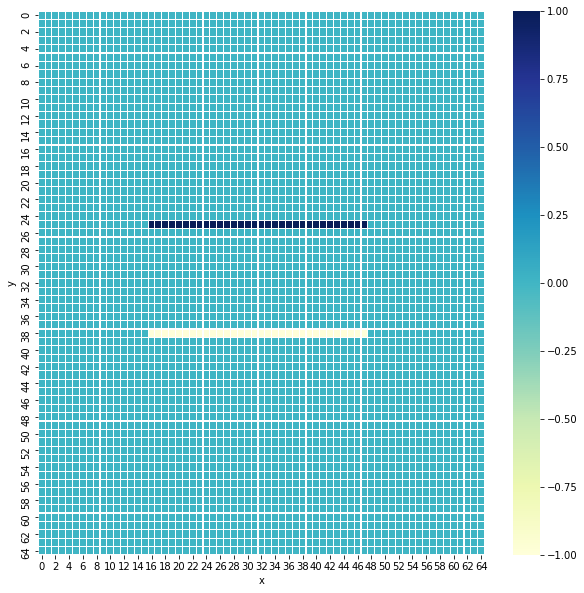

[0.       0.015625 0.03125  0.046875 0.0625   0.078125 0.09375  0.109375
 0.125    0.140625 0.15625  0.171875 0.1875   0.203125 0.21875  0.234375
 0.25     0.265625 0.28125  0.296875 0.3125   0.328125 0.34375  0.359375
 0.375    0.390625 0.40625  0.421875 0.4375   0.453125 0.46875  0.484375
 0.5      0.515625 0.53125  0.546875 0.5625   0.578125 0.59375  0.609375
 0.625    0.640625 0.65625  0.671875 0.6875   0.703125 0.71875  0.734375
 0.75     0.765625 0.78125  0.796875 0.8125   0.828125 0.84375  0.859375
 0.875    0.890625 0.90625  0.921875 0.9375   0.953125 0.96875  0.984375
 1.      ]


In [181]:
#Creating domain
x = np.linspace(0,1, N)
y = np.linspace(0,1, N)

#Creating lines of charge
dx = 1/(N-1)
dy = dx
p = np.zeros((N,N))

jmin = int(0.25/dx)
jmax = int(0.75/dx)
i2 = int(0.6/dy)
i1 = int(0.4/dy)
for j in range(jmin, jmax):
        p[i2, j] = -rho0
        p[i1, j] = rho0

ex = dx**(-2)
ey = ex

#Visualizing the lines of charge and the domain
plt.figure (figsize = (10,10))
ax = sns.heatmap(p, linewidth=0.1, cmap = "YlGnBu")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(x)

In [179]:
#Reindexing
#New rho 
pk = np.zeros ((N*N))
for i in range (N):
    for j in range (N):
        pk [i*N+j] = p [i,j]

#Matrix of coefficients
coef = np.zeros((N**2,N**2))

for k in range (N*N):
    coef [k,k] = -2*(ex+ey)
    if k > 0:
        coef [k,k-1] = ey
    if k < (N*N-1):
        coef [k,k+1] = ey
    if k > (N+1): 
        coef [k,k-N-1] = ex
    if k  < (N*N-N-1): 
        coef [k,k+N+1] = ex

In [ ]:
def Jacobi(A, b, N, x_init): 
    D = np.diag(A)
    R = A - np.diagflat(D)
    for i in range(N):
        x = (b - R.dot(x_init))/D
        x_init = x
    return x
u = Jacobi (coef, -pk/epsilon_0, int(1e4), np.zeros(len(pk)))

In [187]:
pot_u = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        pot_u[i,j] = u[i*N+j]

Text(0.5, 1.0, '$\\nabla^2 u = -\\rho/\\epsilon_0$')

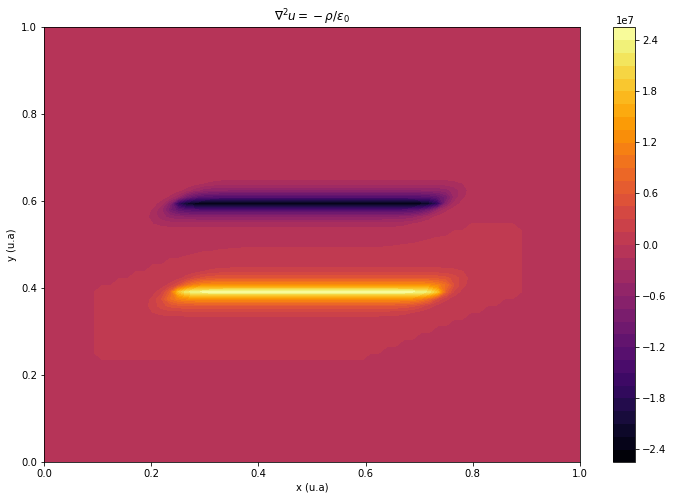

In [188]:
py.figure(figsize = (12,8))
py.contourf(x,y,pot_u, 40, cmap = 'inferno')
py.colorbar()
py.xlabel('x (u.a)')
py.ylabel('y (u.a)')
py.title(r'$\nabla^2 u = -\rho/\epsilon_0$')